**Algoritmos de Clasificación 5 - Mejorando KNN - LoL e-sports**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #la libreria para separar en train y test
from sklearn.neighbors import KNeighborsClassifier #knn

In [39]:
url_teams = 'https://raw.githubusercontent.com/cporras/lol-esports/main/Data/df_teams.csv'
df = pd.read_csv(url_teams)

In [40]:
#Usamos las estadisticas obtenidas al minuto 15 de una partida,
#de esta manera entrenaremos un modelo con el objetivo de predecir el resultado de un juego al minuto 15

#Los datos que entran son resultado, primer asesinato, primer dragon, primer heraldo, primera torre, y oro, experiencia, cs y asesinatos al minuto 15
features = ['result','firstblood','firstdragon','firstherald','firsttower','goldat15','xpat15','csat15','golddiffat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15']
df_feat =  df[features]
df_feat.head()

,result,firstblood,firstdragon,firstherald,firsttower,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
0,0,1.0,1.0,1.0,1.0,24815.0,31121.0,608.0,951.0,-107.0,18.0,1.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,23864.0,31228.0,590.0,-951.0,107.0,-18.0,0.0,0.0,1.0
2,0,0.0,0.0,1.0,1.0,27355.0,32158.0,560.0,2145.0,-420.0,44.0,5.0,6.0,6.0
3,1,1.0,1.0,0.0,0.0,25210.0,32578.0,516.0,-2145.0,420.0,-44.0,6.0,9.0,5.0
4,0,1.0,1.0,1.0,0.0,24131.0,29284.0,527.0,-457.0,-1218.0,-16.0,2.0,3.0,3.0


In [41]:
df_feat.shape

(682, 14)

In [42]:
df_feat.dtypes

result            int64
firstblood      float64
firstdragon     float64
firstherald     float64
firsttower      float64
goldat15        float64
xpat15          float64
csat15          float64
golddiffat15    float64
xpdiffat15      float64
csdiffat15      float64
killsat15       float64
assistsat15     float64
deathsat15      float64
dtype: object

In [43]:
df_feat.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
#Separamos los datos de entrada de la salida
X = df_feat.drop('result', axis=1) #Elimino de mi dataset la variable a predecir
y = df_feat.result #Defino el Target

In [45]:
#Separación del dataset, 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
X = X_train
y = y_train

knn.fit(X, y)

KNeighborsClassifier()

In [47]:
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

In [48]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8375527426160337
% de aciertos sobre el set de evaluación: 0.7843137254901961


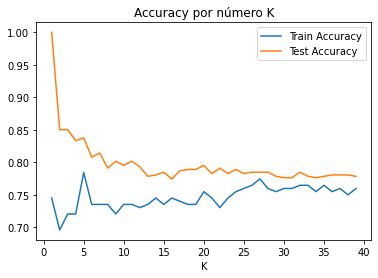

In [56]:
rows = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X, y)
  y_train_pred = knn.predict(X_train)
  y_test_pred = knn.predict(X_test)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  rows.append([i, test_accuracy,train_accuracy])
acc = pd.DataFrame(rows, columns=['K', 'Train Accuracy','Test Accuracy'])
acc.plot(kind='line', x='K', y =['Train Accuracy','Test Accuracy'])
plt.title('Accuracy por número K')
plt.show()

In [50]:
#Se decide trabajar con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)
X = X_train
y = y_train
knn.fit(X, y)
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Evaluación del modelo

In [51]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7843137254901961


[[79 23]
 [21 81]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


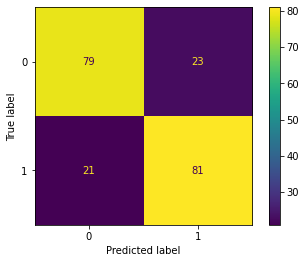

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(knn, X_test, y_test)
plt.show()



In [53]:
cm = confusion_matrix(y_test, y_test_pred)
precision = cm[1][1] / (cm[1][1]+cm[1][0])
recall  = cm[1][1] / (cm[1][1]+cm[0][1])
accuracy  = (cm[1][1]+cm[0][0]) / (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
especifity  = cm[0][0] / (cm[0][0]+cm[0][1])
print('precision:   % ',precision)
print('recall:      % ',recall)
print('accuracy:    % ',accuracy)
print('especifity:  % ',especifity)

precision:   %  0.7941176470588235
recall:      %  0.7788461538461539
accuracy:    %  0.7843137254901961
especifity:  %  0.7745098039215687


In [54]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print("F1 Score:    % ", f1_score(y_test, y_test_pred))

F1 Score:    %  0.7864077669902914


#Curva ROC

AUC for our classifier is: 0.784313725490196


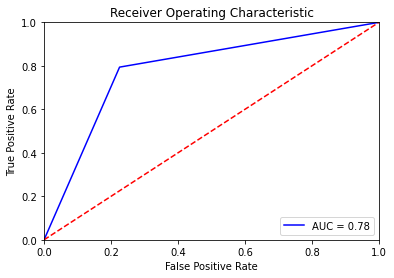

In [55]:
from sklearn.metrics import roc_curve, auc

class_probabilities = knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Leave One Out Cross-Validation - LOOCV

In [66]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [57]:
# Separacion en X e y
X = df_feat.drop('result', axis=1) #Elimino de mi dataset la variable a predecir
y = df_feat.result #Defino el Target

print(X.shape, y.shape)

(678, 13) (678,)


In [58]:
pd.Series(y).value_counts()

1    339
0    339
Name: result, dtype: int64

In [72]:
#Creamos el modelo 
model = KNeighborsClassifier(n_neighbors=5)

#Creamos el objeto de cross val
cv = LeaveOneOut()

In [73]:
# Evaluacion del Modelo
%%time
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

CPU times: user 806 ms, sys: 8.8 ms, total: 815 ms
Wall time: 4.3 s


In [75]:
scores

array([0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [76]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.755 (0.430)


#K- FOLD CROSS VALIDATION

In [77]:
kf = KFold(n_splits=10)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)

In [78]:
scores

array([0.69117647, 0.75      , 0.77941176, 0.72058824, 0.77941176,
       0.75      , 0.63235294, 0.79411765, 0.79104478, 0.68656716])

In [79]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.737 (0.051)


#StratifiedKFold

In [80]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

In [81]:
%%time
scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf, n_jobs=-1)

CPU times: user 25.7 ms, sys: 115 µs, total: 25.8 ms
Wall time: 68.7 ms


In [82]:
scores

array([0.73529412, 0.76470588, 0.72058824, 0.73333333, 0.8       ])

In [83]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.751 (0.029)


#GridSearchCV - RandomizedSearchCV

In [85]:
#Importamos librerias y el Dataset
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [86]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [96]:
#Definicion de Hyperparámetros
param_grid = {'n_neighbors':np.arange(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

#Utilizamos la grilla definida anteriormente...
model = GridSearchCV(knn, param_grid=param_grid, cv=5,scoring='roc_auc',verbose=20)

In [97]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform
[CV 1/5; 1/180] END algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform;, score=0.738 total time=   0.0s
[CV 2/5; 1/180] START algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform
[CV 2/5; 1/180] END algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform;, score=0.674 total time=   0.0s
[CV 3/5; 1/180] START algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform
[CV 3/5; 1/180] END algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform;, score=0.716 total time=   0.0s
[CV 4/5; 1/180] START algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform
[CV 4/5; 1/180] END algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform;, score=0.728 total time=   0.0s
[CV 5/5; 1/180] START algorithm=auto, leaf_size=1, n_neighbors=1, weights=uniform
[CV 5/5; 1/180] END algorithm=auto, leaf_size=1, n_neighbors=1, weights=uni

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=20)

In [98]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}
Mejor Score: 0.8386656858306927

